In [37]:
import matplotlib.pyplot as plt
import ultralytics
import h5py
import numpy as np
import cv2
import torch
import torchvision.transforms as T

In [88]:
# load the data
file_path = 'D:/HCAI/msc/strawml/data/interim/train.hdf5'
with h5py.File(file_path, 'r') as f:
    keys = list(f.keys())
    for key in keys:
        img = f[key]['image'][...]
        break

# Convert the binary data to a NumPy array
image_array = np.frombuffer(img, np.uint8)
# Decode the image
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = torch.from_numpy(image)
torch_transformer = T.ToPILImage()

```Python
hsv_h: 0.015 # image HSV-Hue augmentation (fraction)
hsv_s: 0.7 # image HSV-Saturation augmentation (fraction)
hsv_v: 0.45 # image HSV-Value augmentation (fraction)
degrees: 45.0 # random rotation (± deg) NOT DEFAULT
translate: 0.1 # random translation (± fraction)
scale: 0.5 # random scale (± fraction)
shear: 10.0 # random shear (± deg) NOT DEFAULT
perspective: 0.0 # random perspective (± fraction), range 0-0.001
flipud: 0.5 # random flip up-down (probability)
fliplr: 0.5 # random flip left-right (probability)
mosaic: 1.0 # random mosaic (probability)
mixup: 0.0 # random mixup (probability)
copy_paste: 0.0 # random copy-paste (probability)
erasing: 0.4 # random cutmix (probability)
crop_fraction: 1.0 # random cutmix (probability)
```


#### hsv_h, hsv_s, hsv_v

In [89]:
# hsv_h from ultralytics
# transform = ultralytics.data.augment.classify_augmentations(size=224, hsv_h=0.015)
transform_color = T.ColorJitter(brightness=0.45, contrast=0.45, saturation=0.7, hue=0.015)
i_ = torch_transformer(image.permute(2, 0, 1))
augmented_image = transform_color(i_)

AttributeError: 'numpy.ndarray' object has no attribute 'permute'

(-0.5, 2559.5, 1439.5, -0.5)

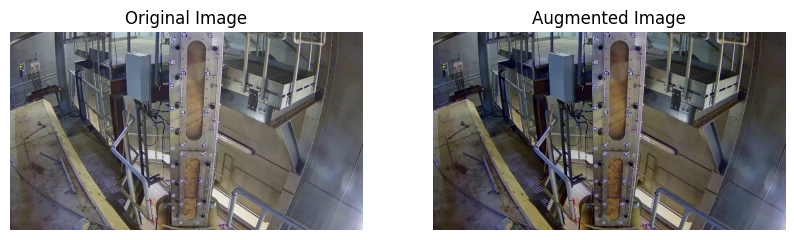

In [90]:
# show original image and augmented image side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(augmented_image)
ax[1].set_title('Augmented Image')
ax[1].axis('off')


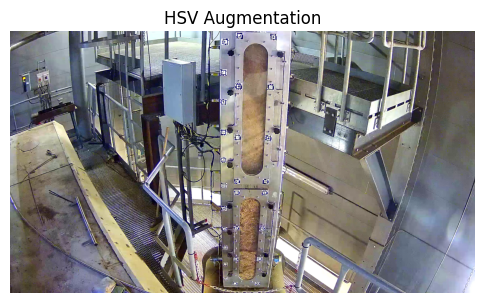

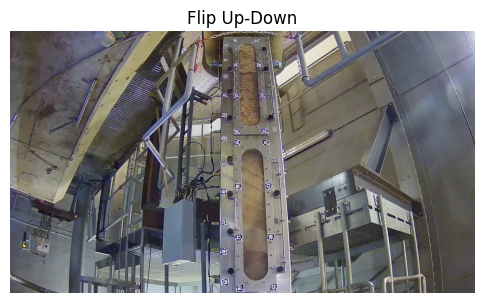

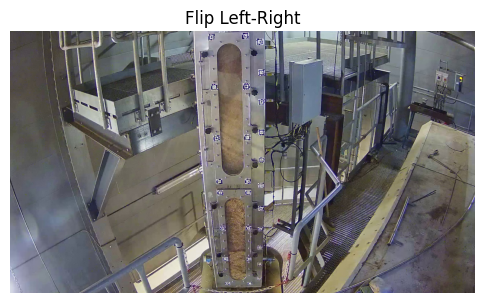

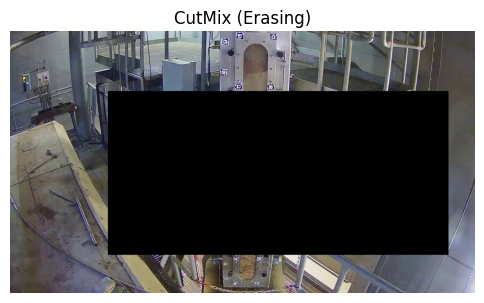

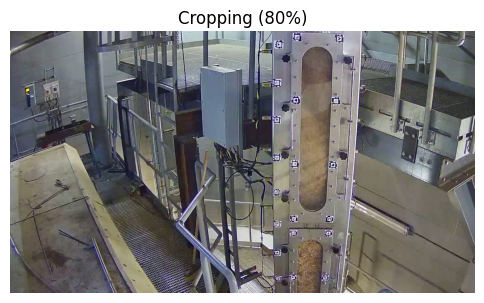

In [ ]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import h5py
import torchvision.transforms as T
from ultralytics.utils import ops, instance
from ultralytics.data.augment import LetterBox, RandomPerspective

# Load the image from HDF5
file_path = 'D:/HCAI/msc/strawml/data/interim/train.hdf5'
with h5py.File(file_path, 'r') as f:
    keys = list(f.keys())
    for key in keys:
        img = f[key]['image'][...]
        break

# Convert the binary data to a NumPy array and decode it
image_array = np.frombuffer(img, np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to apply an augmentation and display results
def show_augmentation(aug_func, *args, title="Augmentation", **kwargs):
    augmented_img = aug_func(img.copy(), *args, **kwargs)
    plt.figure(figsize=(6, 6))
    plt.imshow(augmented_img)
    plt.title(title)
    plt.axis("off")
    plt.show()

# 1. HSV Adjustments
def hsv_augmentation(image, h, s, v):
    transform_color = T.ColorJitter(brightness=v, contrast=v, saturation=s, hue=h)
    img_tensor = T.ToTensor()(image)  # Convert image to tensor
    augmented_tensor = transform_color(img_tensor)  # Apply augmentation
    augmented_img = T.ToPILImage()(augmented_tensor)  # Convert back to image
    return np.array(augmented_img)  # Convert to NumPy array for visualization

show_augmentation(hsv_augmentation, 0.015, 0.7, 0.45, title="HSV Augmentation")



# 3. Flipping
show_augmentation(np.flipud, title="Flip Up-Down")  # Flip vertically
show_augmentation(np.fliplr, title="Flip Left-Right")  # Flip horizontally

# 4. CutMix (Erasing)
def cutmix_augmentation(image):
    img_copy = image.copy()
    h, w = img_copy.shape[:2]
    x1, y1, x2, y2 = np.random.randint(0, w // 2), np.random.randint(0, h // 2), np.random.randint(w // 2, w), np.random.randint(h // 2, h)
    img_copy[y1:y2, x1:x2] = 0  # Blackout a random area
    return img_copy

show_augmentation(cutmix_augmentation, title="CutMix (Erasing)")

# 5. Cropping
def crop_augmentation(image, fraction=0.8):
    h, w = image.shape[:2]
    crop_h, crop_w = int(h * fraction), int(w * fraction)
    return image[:crop_h, :crop_w]

show_augmentation(crop_augmentation, fraction=0.8, title="Cropping (80%)")
